**Import Packages**

In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import RMSprop

import random
base_dir='../input/defect-imageset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

**Explore the Data**

In [ ]:
train_B_MD_Line = os.path.join(train_dir, 'B_MD Line')
train_Bright = os.path.join(train_dir, 'Bright')
train_Coating = os.path.join(train_dir, 'Coating')
train_D_MD_Line = os.path.join(train_dir, 'D_MD Line')
train_Dark = os.path.join(train_dir, 'Dark')
train_Dent = os.path.join(train_dir, 'Dent')
train_Insect = os.path.join(train_dir, 'Insect')
train_Pass_G_Film = os.path.join(train_dir, 'Pass_G_Film')
train_Pass_Glue = os.path.join(train_dir, 'Pass_Glue')
train_Pass_W_Film = os.path.join(train_dir, 'Pass_W_Film')
train_Scratch = os.path.join(train_dir, 'Scratch')
train_Substance = os.path.join(train_dir, 'Substance')
train_Uncoating = os.path.join(train_dir, 'Uncoating')

In [ ]:
validation_dir_B_MD_Line = os.path.join(validation_dir, 'B_MD Line')
validation_dir_Bright = os.path.join(validation_dir, 'Bright')
validation_dir_D_MD_Line = os.path.join(validation_dir, 'D_MD Line')
validation_dir_Dark = os.path.join(validation_dir, 'Dark')
validation_dir_Dent = os.path.join(validation_dir, 'Dent_RGH')
validation_dir_Insect = os.path.join(validation_dir, 'Insect')
validation_dir_Pass_G_Film = os.path.join(validation_dir, 'Pass_G_Film')
validation_dir_Pass_Glue = os.path.join(validation_dir, 'Pass_Glue')
validation_dir_Pass_W_Film = os.path.join(validation_dir, 'Pass_W_Film')
validation_dir_Scratch = os.path.join(validation_dir, 'Scratch')
validation_dir_Substance = os.path.join(validation_dir, 'Substance')
validation_dir_Uncoating = os.path.join(train_dir, 'Uncoating')

**Data Preprocessing**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='categorical',target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode='categorical',target_size=(150,150))

Found 15858 images belonging to 13 classes.
Found 1718 images belonging to 12 classes.


**Building Model**

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')    
])

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

**Training**

In [ ]:

history=model.fit_generator(train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=100,
                           epochs=158,
                           validation_steps=50,
                           verbose=1)


model.save("rps.h5")

Epoch 1/158
100/100 [==============================] - 47s 467ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 2/158
100/100 [==============================] - 46s 460ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 3/158
100/100 [==============================] - 47s 466ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 4/158
100/100 [==============================] - 46s 462ms/step - loss: 1.1921e-07 - acc: 0.9227 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 5/158
100/100 [==============================] - 46s 463ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 6/158
100/100 [==============================] - 47s 465ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 7/158
100/100 [==============================] - 59s 589ms/step - loss: 1.1921e-07 - acc: 0.9227 - val_loss: 1.1921e-07 - val_acc:

100/100 [==============================] - 47s 468ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 114/158
100/100 [==============================] - 47s 470ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 115/158
100/100 [==============================] - 46s 460ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 116/158
100/100 [==============================] - 47s 470ms/step - loss: 1.1921e-07 - acc: 0.9227 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 117/158
100/100 [==============================] - 47s 469ms/step - loss: 1.1921e-07 - acc: 0.9227 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 118/158
100/100 [==============================] - 47s 469ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc: 0.9167
Epoch 119/158
100/100 [==============================] - 46s 461ms/step - loss: 1.1921e-07 - acc: 0.9231 - val_loss: 1.1921e-07 - val_acc:

**Evaluating Accuracy and Loss for the Model**

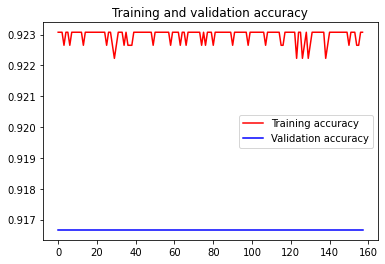

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()